# Calculate robusteness from pi control runs

In [1]:
# Some definitions

# directory of data
#fdir = '~/Google Drive/professional/research/FARALLON_INSTITUTE_PROJECTS/2020 NOAA MAPP/Climate_extremes_sharedfigsandcode/data/FOR SCATTER PLOT/'
fdir = '/Volumes/GoogleDrive/My Drive/Climate_extremes_sharedfigsandcode/data/Annual_TimeSeries/'

In [2]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [3]:
#detrend function: detrend use polynomial fit
def detrend(x,y,degree):
    import statsmodels.formula.api as smf
    import numpy as np
    import pandas as pd
    

    df = pd.DataFrame(columns=['y', 'x'])
    df['x'] = x
    df['y'] = pd.Series(y)   #y

    idx = np.isfinite(x) & np.isfinite(y)
    weights = np.polyfit(x[idx], y[idx], degree)
    model = np.poly1d(weights)
    results = smf.ols(formula='y ~ model(x)', data=df).fit()

    p_value=results.f_pvalue
    r2=results.rsquared_adj

    detrend_ts=np.zeros(shape=(len(y),))
    detrend_ts[:] = np.nan
    detrend_ts[idx]=y[idx]-results.fittedvalues

    #plt.figure(figsize=(10,4))
    #plt.plot(x,y)
    #plt.plot(x[idx], results.fittedvalues, 'r')
    #plt.figure(figsize=(10,4))
    #plt.plot(x, detrend_ts)
    #plt.show()

    return p_value, r2, detrend_ts

In [4]:
def num_coevents(y1, y2, pct1, pct2,  runs='picontrol',loc='cclme'):
    # 
    fin1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
    fin2 = fdir+'original ts/'+runs+'_'+'cclme_sst.nc'

    modsst = xr.open_dataset(fin1)
    modsst.close()
    modsm2 = xr.open_dataset(fin2)
    modsm2.close()

    fin3 = fdir+'original ts/'+runs+'_sm.nc'
    modsm = xr.open_dataset(fin3)
    modsm.close()
    models = modsm.model

    # selec periood
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1,y2))
    
    nev = list()
    drt=list()
    mhw=list()    
    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1_0= modsst.sel(model=i).sst.values
        tmp2_0= modsm2.sel(model=i).sst.values
        
        #detrend
        nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
        [p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
        nsample = np.linspace(1,len(tmp2_0), len(tmp2_0))
        [p_value, r2, tmp2]= detrend(nsample,tmp2_0,1)
    
        # calculate threshold
        mhw_thr = np.nanpercentile(tmp1,pct1)
        drg_thr = np.nanpercentile(tmp2,pct1)
    
        a1 = tmp1>=mhw_thr
        a2 = tmp2>=drg_thr
        
        tmp = np.full((len(modsst.year.values),1),1)
        tmp = tmp[a1*a2]
    
        nev.append(len(tmp)/30*100)#/(y2-y1+1)) #freq.
        drt.append(drg_thr)
        mhw.append(mhw_thr) 
        print(len(tmp1),len(tmp2))
    return nev,mhw, drt  # sum(nev)

In [5]:
ny =30
prc1 = 90
prc2 = 10
loc='goalme'

pinev=list()
mhw=list()
drt=list()
for i in range(int(500/ny)):
    nev,mhw0, drt0 = num_coevents(i*ny+1, (i+1)*ny, prc1, prc2,loc=loc)
    pinev.append(nev)
    mhw.append(mhw0)
    drt.append(drt0)
pinev ,np.mean(pinev),np.mean(mhw),np.mean(drt)

30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 3

([[6.666666666666667,
   6.666666666666667,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   0.0,
   6.666666666666667,
   10.0,
   0.0,
   6.666666666666667,
   3.3333333333333335,
   0.0,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335],
  [3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   6.666666666666667,
   6.666666666666667,
   6.666666666666667,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   10.0,
   6.666666666666667,
   6.666666666666667,
   0.0,
   0.0,
   0.0,
   3.3333333333333335,
   6.666666666666667],
  [6.666666666666667,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   6.666666666666667,
   0.0,
   3.3333333333333335,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   3.33333333

In [6]:
#model by model

In [7]:
model_mean=np.mean(pinev,axis=0)
model_spread=np.std(pinev,axis=0)#*np.std(pinev,axis=0)
IV=(np.sum((model_spread*model_spread))/22)**.5
IV,model_spread

(2.4336200017938943,
 array([2.6020825 , 3.11804782, 2.27264836, 1.75544787, 2.34779743,
        1.94320397, 2.5       , 2.20479276, 3.22075517, 3.27421534,
        1.99826313, 1.85170717, 2.11435241, 2.69226   , 2.62698338,
        2.6020825 , 2.27264836, 2.11435241, 2.93890333, 1.99826313,
        2.03058216, 2.20479276]))

In [8]:
#16 30-yr periods MMEs

In [9]:
mme_mean=np.mean(pinev,axis=1)
mme_spread=np.std(pinev,axis=1)#*np.std(pinev,axis=1)
#internal variability mean and spread
mme_spread,
#iv=np.mean(mme_spread)
#iv

(array([2.74823593, 2.7146171 , 2.46182982, 2.87479787, 2.55787015,
        2.83053662, 2.10491576, 2.89469291, 2.44310841, 2.84267622,
        2.57129739, 2.44780219, 1.89242364, 2.93798779, 1.58186462,
        3.27777389]),)

In [10]:
#MME mean and spread

In [11]:
mme_model_mean=np.mean(mme_mean)
mme_model_spread=np.std(mme_mean)
mme_model_mean,mme_model_spread

(3.882575757575758, 0.4757521472378967)

In [12]:
#cross model mean and spread

In [13]:
cross_model_mean=np.mean(model_mean)
cross_model_spread=np.std(model_mean)
cross_model_mean,cross_model_spread

(3.8825757575757573, 1.0483600381134885)

In [14]:
IV,cross_model_spread,mme_model_spread,np.std(pinev),np.std(pinev)-IV

(2.4336200017938943,
 1.0483600381134885,
 0.4757521472378967,
 2.649823594627504,
 0.2162035928336099)

In [15]:
## Calculate thresholds for PI Control runs

In [16]:
def get_thre(fdir, runs,loc, y1,y2,prc1,prc2):
    # open data: anomalies (without trend)

    modsst = xr.open_dataset(fdir+'original ts/'+runs+'_'+loc+'_sst.nc')
    modsst.close()
    modsm2 = xr.open_dataset(  fdir+'original ts/'+runs+'_'+'cclme_sst.nc' )
    modsm2.close()
    modsm = xr.open_dataset(  fdir+'original ts/'+runs+'_sm.nc')
    modsm.close()
    # select period 
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1,y2))
    mhw_thr = list()
    drg_thr = list()
    models = list()

    # Calculate thresholds for each model
    for ix,i in enumerate(modsm.model.values):
        tmp1_0= modsst.sel(model=i).sst.values
        tmp2_0= modsm2.sel(model=i).sst.values
        
        #detrend
        nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
        [p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
        nsample = np.linspace(1,len(tmp2_0), len(tmp2_0))
        [p_value, r2, tmp2]= detrend(nsample,tmp2_0,1)
        
        mhw_thr.append(np.nanpercentile(tmp1,prc1))
        drg_thr.append(np.nanpercentile(tmp2,prc1))

        models.append(i)
        print(len(tmp1),len(tmp2))
    
    return mhw_thr, drg_thr, models

In [21]:
# calculate number of events for control, historical and future
# based on thresholds in each run

def freq_coevents(fdir, runs, loc, mhw_thr, drg_thr, models, y1, y2):
    #pi control
    fi1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
    fi2 =  fdir+'original ts/'+runs+'_'+'cclme_sst.nc' 
    modsst = xr.open_dataset(fi1)
    modsst.close()
    modsm2 = xr.open_dataset(fi2)
    modsm2.close()

    # select period
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1,y2))

    nev = list()
    ts_sst=list()
    ts_sm=list()

    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1_0= modsst.sel(model=i).sst.values
        tmp2_0= modsm2.sel(model=i).sst.values
        
        #detrend
        nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
        [p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
        nsample = np.linspace(1,len(tmp2_0), len(tmp2_0))
        [p_value, r2, tmp2]= detrend(nsample,tmp2_0,1)
        
        ts_sst.append(tmp1)
        ts_sm.append(tmp2)
   
        a1 = tmp1>=mhw_thr[ix]
        a2 = tmp2>=drg_thr[ix]
        tmp = np.full((len(modsst.year.values),1),1)
        tmp = tmp[a1*a2]

        nev.append(len(tmp)/30*100)
    
    freq = np.array(nev)/(y2-y1+1)
    
    plt.figure(figsize=(10,4))
    plt.plot(nsample, np.asarray(ts_sst).T)
    plt.show()
    plt.figure(figsize=(10,4))
    plt.plot(nsample, np.asarray(ts_sm).T)
    plt.show()
    return nev,np.round(np.nanmean(nev),4), np.round(np.nanstd(nev),4) #mean no. of events
#freq, np.round(np.nanmean(freq),4), np.round(np.nanstd(freq),4) #mean frequency


In [22]:
def freq_difruns(fdir,loc, ny, prc1, prc2):
    
   # # calculate threshold in historical 1
   # y1 = 1900
   # y2 = y1+ny-1
   # mhw_thr, drg_thr, models = get_thre(fdir, 'historical',loc,y1,y2,prc1,prc2)

    # historical 1
   # y1 = 1900
   # y2 = y1+ny-1
   # print('\nhistorical: '+str(y1)+'-'+str(y2))
   # freq, mfrq, sfrq = freq_coevents(fdir,'historical',loc,mhw_thr,drg_thr, models, y1,y2)
   # print(mfrq,sfrq)

    # calculate threshold in historical 2
    y2=2029
    y1=y2-ny+1
    mhw_thr1, drg_thr1, models = get_thre(fdir, 'histssp585',loc,y1,y2,prc1,prc2)

    # historical 2
    y2=2029
    y1=y2-ny+1
    print('\nhistorical 2: '+str(y1)+'-'+str(y2))
    freq1, mfrq, sfrq = freq_coevents(fdir,'histssp585',loc,mhw_thr1,drg_thr1, models, y1,y2)
    print(mfrq,sfrq)
    
       
    # calculate threshold in historical 2
    y2=2014
    y1=y2-ny+1
    mhw_thr1, drg_thr1, models = get_thre(fdir, 'historical',loc,y1,y2,prc1,prc2)

    # historical 2
    y2=2014
    y1=y2-ny+1
    print('\nhistorical 2: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'historical',loc,mhw_thr1,drg_thr1, models, y1,y2)
    print(mfrq,sfrq)


    # calculate threshold in future 1
    y2=2099
    y1=y2-ny+1
    mhw_thr2, drg_thr2, models = get_thre(fdir, 'ssp585',loc,y1,y2,prc1,prc2)

    # future 1
    y2=2099
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq2, mfrq, sfrq = freq_coevents(fdir,'ssp585',loc,mhw_thr2,drg_thr2, models, y1,y2)
    print(mfrq,sfrq)
    
    # calculate threshold in future 2
    y2=2069
    y1=y2-ny+1
    mhw_thr, drg_thr, models = get_thre(fdir, 'ssp585',loc,y1,y2,prc1,prc2)

    # future 2
    y2=2069
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'ssp585',loc,mhw_thr,drg_thr, models, y1,y2)
    print(mfrq,sfrq)
 
    y2=2044
    y1=y2-ny+1
    mhw_thr1, drg_thr1, models = get_thre(fdir, 'ssp585',loc,y1,y2,prc1,prc2)

    # future 2
    y2=2044
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'ssp585',loc,mhw_thr1,drg_thr1, models, y1,y2)
    print(mfrq,sfrq)

    return freq1, freq2,mhw_thr1, drg_thr1,mhw_thr2, drg_thr2

In [23]:
# Frequency of events - detrended data, using individual threshols
## percentiles 90-10


Percentiles: 90/10

Probable # events in 30 years: 0.3
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30

historical 2: 2000-2029


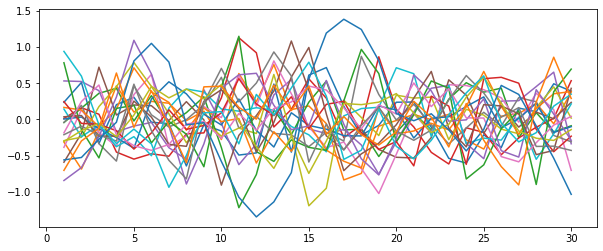

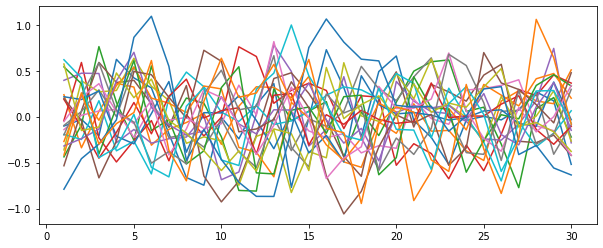

3.6364 2.2268
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30

historical 2: 1985-2014


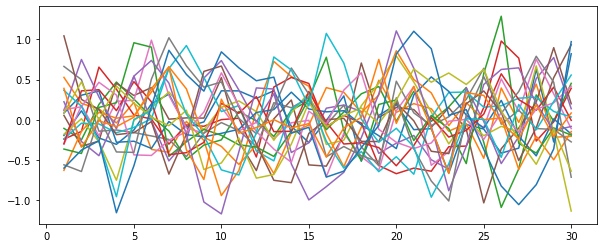

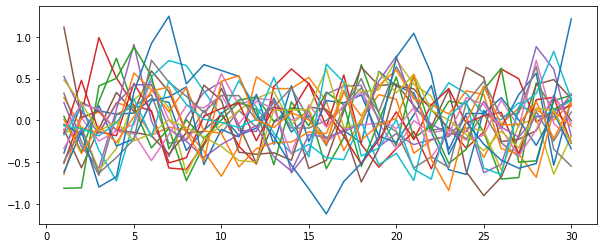

5.0 1.9462
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30

future: 2070-2099


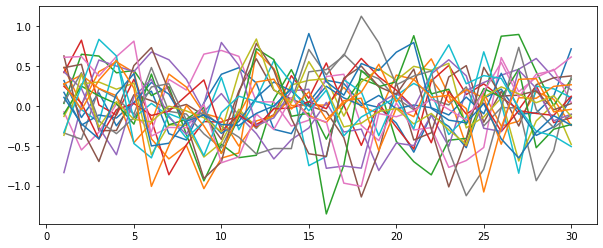

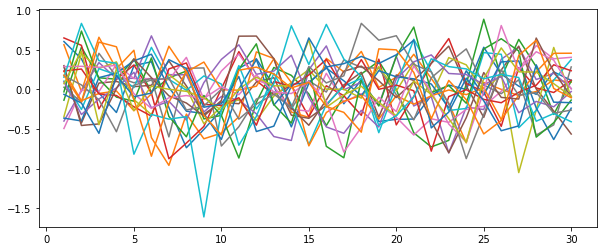

3.4848 2.5579
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30

future: 2040-2069


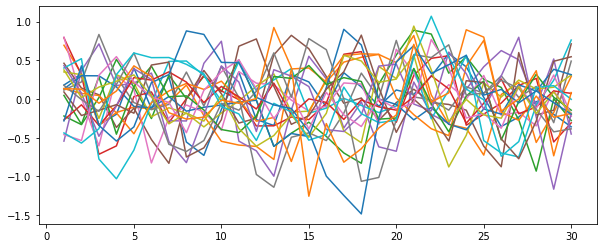

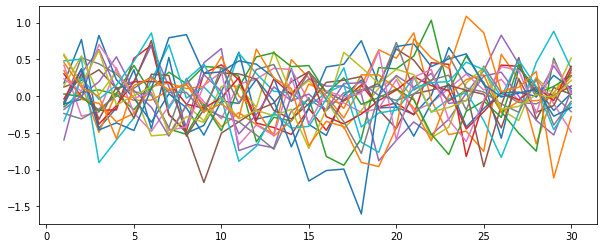

3.1818 2.7482
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30
30 30

future: 2015-2044


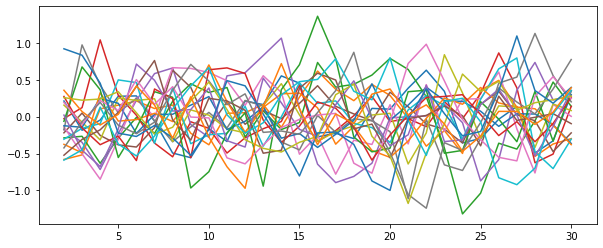

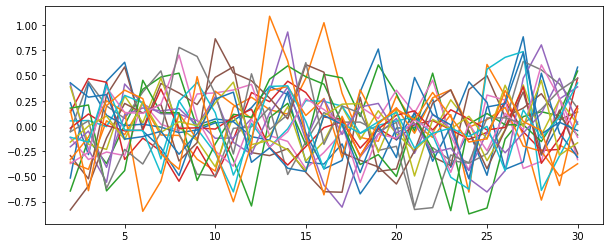

2.1212 2.3667


([0.0,
  0.0,
  6.666666666666667,
  6.666666666666667,
  3.3333333333333335,
  0.0,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  3.3333333333333335,
  0.0,
  6.666666666666667,
  3.3333333333333335,
  0.0,
  10.0,
  6.666666666666667],
 3.484848484848485,
 3.636363636363636,
 0.45689842254178414,
 0.4004517146754216)

In [24]:

print ('\nPercentiles: '+str(prc1)+'/'+str(prc2))
print('\nProbable # events in '+str(ny)+' years'+': '+str(ny*0.01))

hinev,funev, mhw_thr1, drg_thr1,mhw_thr2, drg_thr2=freq_difruns(fdir,loc,ny, prc1, prc2)
funev,np.mean(funev),np.mean(hinev),np.mean(mhw_thr2),np.mean( drg_thr2)

In [25]:
loc,ny

('goalme', 30)

In [26]:
N=int(500/ny)
N

16

In [27]:
#hist - picontrol FAR

In [28]:
np.mean(model_mean),np.mean(hinev),np.mean(funev)

(3.8825757575757573, 3.636363636363636, 3.484848484848485)

In [29]:
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(hinev,pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
diff_mean.mean(),diff_spread


(-0.24621212121212116, 0.47575214723789655)

In [30]:
hinev_a=np.asarray(hinev).sum()#.reshape(N,22).sum(axis=1)
pinev_a=np.asarray(pinev).reshape(N,22).sum(axis=1)
far=(hinev_a-pinev_a)/hinev_a
FAR=np.mean(far)
sd=np.std(far)
FAR,sd


(-0.06770833333333356, 0.1308318404904216)

In [31]:
import statsmodels.api as sm
import statsmodels as sm
import pandas
from patsy import dmatrices
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
cu,cl

(nan, nan)

In [32]:
#future - hist change

In [33]:
diff=np.mean(funev)-np.mean(hinev)
diff

-0.15151515151515094

In [34]:
#diff=np.mean(funev)-np.mean(hinev)
#diff=funev-hinev
diff=list()
zip_obj=zip(funev,hinev)
for i , j in zip_obj:
        diff.append(i-j)
diff
diff_mean=np.mean(diff)
diff_spread_mme=np.std(diff)
diff_mean,diff_spread_mme-IV,mme_model_spread

(-0.1515151515151514, 0.9712595518794744, 0.4757521472378967)

In [35]:
#future - picontrol

In [36]:
#cross-model spread
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(funev,pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_mean=np.mean(diff)
diff_spread=np.std(diff)-IV
diff_mean,diff_spread

(-0.3977272727272727, 1.3975249448751184)

In [37]:
#cross-mme spread
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(funev,pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
diff_mean.mean(),diff_spread

(-0.3977272727272728, 0.4757521472378966)

In [38]:
funev_a=np.asarray(funev).sum()#.reshape(N,22).sum(axis=1)
pinev_a=np.asarray(pinev).reshape(N,22).sum(axis=1)
far=(funev_a-pinev_a)/funev_a
FAR=np.mean(far)
sd=np.std(far)
FAR=np.mean(far)
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
FAR,cu,cl,sd

(-0.11413043478260866, nan, nan, 0.13652018138130945)

In [39]:
funev_a=np.asarray(funev).sum()#.reshape(N,22).sum(axis=1)
pinev_a=np.asarray(pinev).reshape(N,22).sum(axis=1)
far=(funev_a)/pinev_a
FAR=np.mean(far)
sd=np.std(far)
FAR=np.mean(far)
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
FAR,cu,cl,sd

(0.9114106076713835, 0.35448653315561796, 1.0, 0.11359915101256102)

In [40]:
far

array([1.0952381 , 0.92      , 1.04545455, 0.82142857, 1.0952381 ,
       0.85185185, 0.79310345, 0.92      , 0.95833333, 1.04545455,
       0.76666667, 0.85185185, 0.76666667, 0.76666667, 1.        ,
       0.88461538])